PROJET PNEUMO SIIM ACR : https://www.kaggle.com/jesperdramsch/siim-acr-pneumothorax-segmentation-data

Ref médicale : https://link.springer.com/article/10.1007/s10278-019-00299-9

In [ ]:
!pip install fastai --upgrade && pip install pydicom kornia
!pip install nbdev

from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pneumothorax/train-rle.csv')

In [ ]:
df.loc[:, ' EncodedPixels']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             -1
1                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
df.head()

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090,0
1,1.2.276.0.7230010.3.1.4.8323329.12515.1517875239.501137,0
2,1.2.276.0.7230010.3.1.4.8323329.4904.1517875185.355709,1
3,1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312,1
4,1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312,1


In [ ]:
for x in df.index:
  if len(df.loc[x, ' EncodedPixels']) > 3:
    df.loc[x, ' EncodedPixels'] = 'Pneumothorax'
  
  else :
    df.loc[x, ' EncodedPixels'] = 'No Pneumothorax'

In [ ]:
print(df.loc[0, ' EncodedPixels'])

No Pneumothorax


In [ ]:
df_new.iloc[3]

ImageId    1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312
Labels                                                           1
Name: 3, dtype: object

In [ ]:
df_new2 = df.rename(columns={' EncodedPixels': 'Labels'})

In [ ]:
df_new.iloc[0]

ImageId    1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090
Labels                                                          0
Name: 0, dtype: object

In [ ]:
df_new2.to_csv('train-rle-NEW2.csv')
!cp train-rle-NEW2.csv "drive/My Drive/"

DEBUT DU CNN

In [ ]:
df_new2 = pd.read_csv('/content/drive/MyDrive/train-rle-NEW2.csv')

In [ ]:
#items = get_dicom_files("/content/drive/MyDrive/pneumothorax/dicom-images-train")

import pickle
with open ('drive/MyDrive/outfile', 'rb') as fp:
    items = pickle.load(fp)

In [ ]:
items[0]

Path('/content/drive/MyDrive/pneumothorax/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4922.1517875185.487284/1.2.276.0.7230010.3.1.3.8323329.4922.1517875185.487283/1.2.276.0.7230010.3.1.4.8323329.4922.1517875185.487285.dcm')

In [ ]:
imageid2path = {}
for item in items:
    imageid2path['.'.join(str(item).split('/')[-1].split('.')[:-1])] = item
    # imageid2path[str(item).split('/')[-1][:-4]] = item
print(list(imageid2path.keys())[0])

1.2.276.0.7230010.3.1.4.8323329.4922.1517875185.487285


In [ ]:
trn,val = RandomSplitter()(items)

In [ ]:
df_new2['path'] = df_new2['ImageId'].map(imageid2path)

In [ ]:
df_new2.head()

,Unnamed: 0,ImageId,Labels,path
0,0,1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090,No Pneumothorax,/content/drive/MyDrive/pneumothorax/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.5597.1517875188.959089/1.2.276.0.7230010.3.1.3.8323329.5597.1517875188.959088/1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090.dcm
1,1,1.2.276.0.7230010.3.1.4.8323329.12515.1517875239.501137,No Pneumothorax,/content/drive/MyDrive/pneumothorax/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.12515.1517875239.501136/1.2.276.0.7230010.3.1.3.8323329.12515.1517875239.501135/1.2.276.0.7230010.3.1.4.8323329.12515.1517875239.501137.dcm
2,2,1.2.276.0.7230010.3.1.4.8323329.4904.1517875185.355709,Pneumothorax,/content/drive/MyDrive/pneumothorax/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4904.1517875185.355708/1.2.276.0.7230010.3.1.3.8323329.4904.1517875185.355707/1.2.276.0.7230010.3.1.4.8323329.4904.1517875185.355709.dcm
3,3,1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312,Pneumothorax,/content/drive/MyDrive/pneumothorax/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32579.1517875161.299311/1.2.276.0.7230010.3.1.3.8323329.32579.1517875161.299310/1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312.dcm
4,4,1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312,Pneumothorax,/content/drive/MyDrive/pneumothorax/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32579.1517875161.299311/1.2.276.0.7230010.3.1.3.8323329.32579.1517875161.299310/1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312.dcm


In [ ]:
patient = 7
xray_sample = items[patient].dcmread()

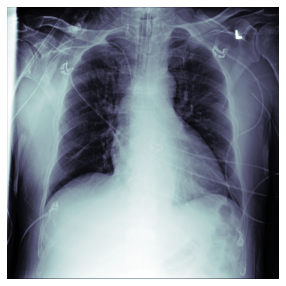

In [ ]:
xray_sample.pixel_array, xray_sample.pixel_array.shape
xray_sample.show()

In [ ]:
index=3
df_new.values[index][:]

array(['1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312',
       'Pneumothorax'], dtype=object)

In [ ]:
df_new.values[0][1]

'No Pneumothorax'

In [ ]:
def get_x(x):
  return x[3]

print(get_x(df_new.values[0]))

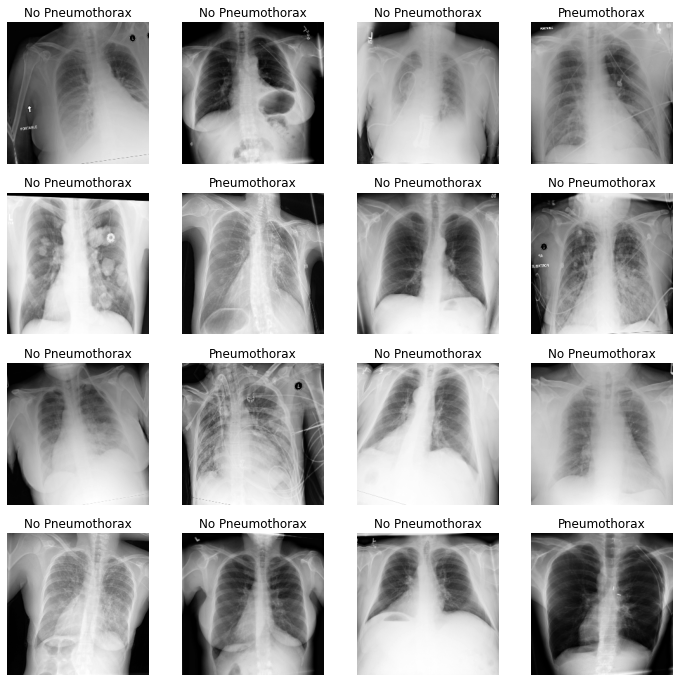

In [ ]:
def get_x(x):
  return x[3]

def get_y(x):
  return x[2]

pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock),
                   get_x=get_x,
                   get_y=get_y,
                   batch_tfms=aug_transforms(size=224))
 
dls = pneumothorax.dataloaders(df_new2.values, num_workers=0)
 
dls = pneumothorax.dataloaders(df_new2.values)
dls.show_batch(max_n=16)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.loss_func
learn.opt_func

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


<function fastai.optimizer.Adam>

In [ ]:
learn.fit(50)

epoch,train_loss,valid_loss,accuracy,time
0,0.683414,0.481438,0.778497,35:12
1,0.491020,0.412194,0.805699,01:59
2,0.445135,0.379053,0.819085,02:00
3,0.404200,0.374523,0.827720,02:00
4,0.390936,0.357904,0.844128,02:00
5,0.373724,0.338690,0.848877,02:00
6,0.354257,0.353085,0.840242,02:00
7,0.351082,0.366959,0.827720,02:00
8,0.334063,0.325512,0.858377,01:59
9,0.323821,0.332964,0.850604,02:00


SuggestedLRs(lr_min=1.9054607491852948e-07, lr_steep=1.0964781722577754e-06)

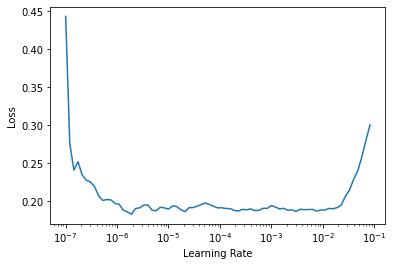

In [ ]:
learn.lr_find()

In [ ]:
learn.show_results(max_n=16)

In [ ]:
purge=False
learn.export(fname='CNNe50_PROJET_PNEUMOTHORAX_FASTAI')


In [ ]:
learn.save('CNNe50_save')

Path('models/CNNe50_save.pth')

In [ ]:
shutil.move("/content/CNNe50_PROJET_PNEUMOTHORAX_FASTAI", "/content/drive/MyDrive")

'/content/drive/MyDrive/CNNe50_PROJET_PNEUMOTHORAX_FASTAI'

EVALUATION DES RESULTATS

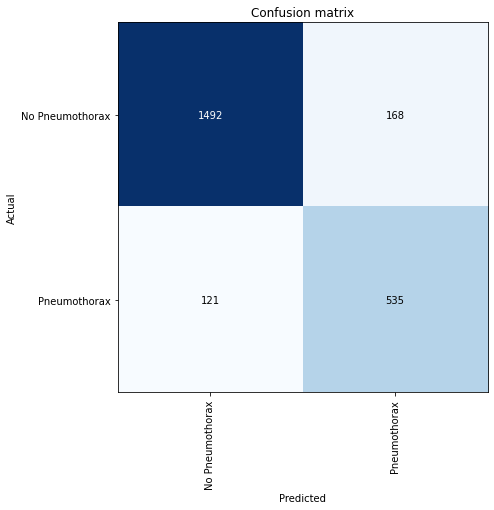

In [ ]:
#tABLEAU DE CONTINGENCE
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

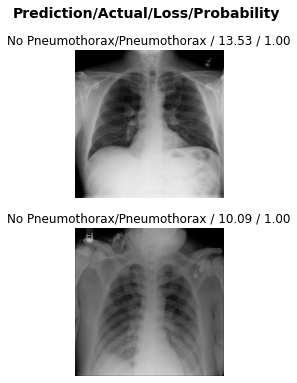

In [ ]:
interp.plot_top_losses(2, nrows=2)

In [ ]:
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
print(tn, fp, fn, tp)

1492 168 121 535


In [ ]:
sensitivity = tp/(tp + fn)
sensitivity

0.8155487804878049

In [ ]:
specificity = tn/(fp + tn)
specificity

0.8987951807228916

In [ ]:
ppv = tp/(tp+fp)
ppv

0.7610241820768137

In [ ]:
npv = tn/(tn+fn)
npv

0.9249845009299442

In [ ]:
#To view the files in the valid dataset you call
val = dls.valid_ds.cat
print(len(val))
#val[0]

2


REIMPORT DU MODELE ENTRAINE

In [ ]:
path = Path()

In [ ]:
learn_inf = load_learner(path/'/content/drive/MyDrive/CNNe30_PROJET_PNEUMOTHORAX_FASTAI')

In [ ]:
import pydicom


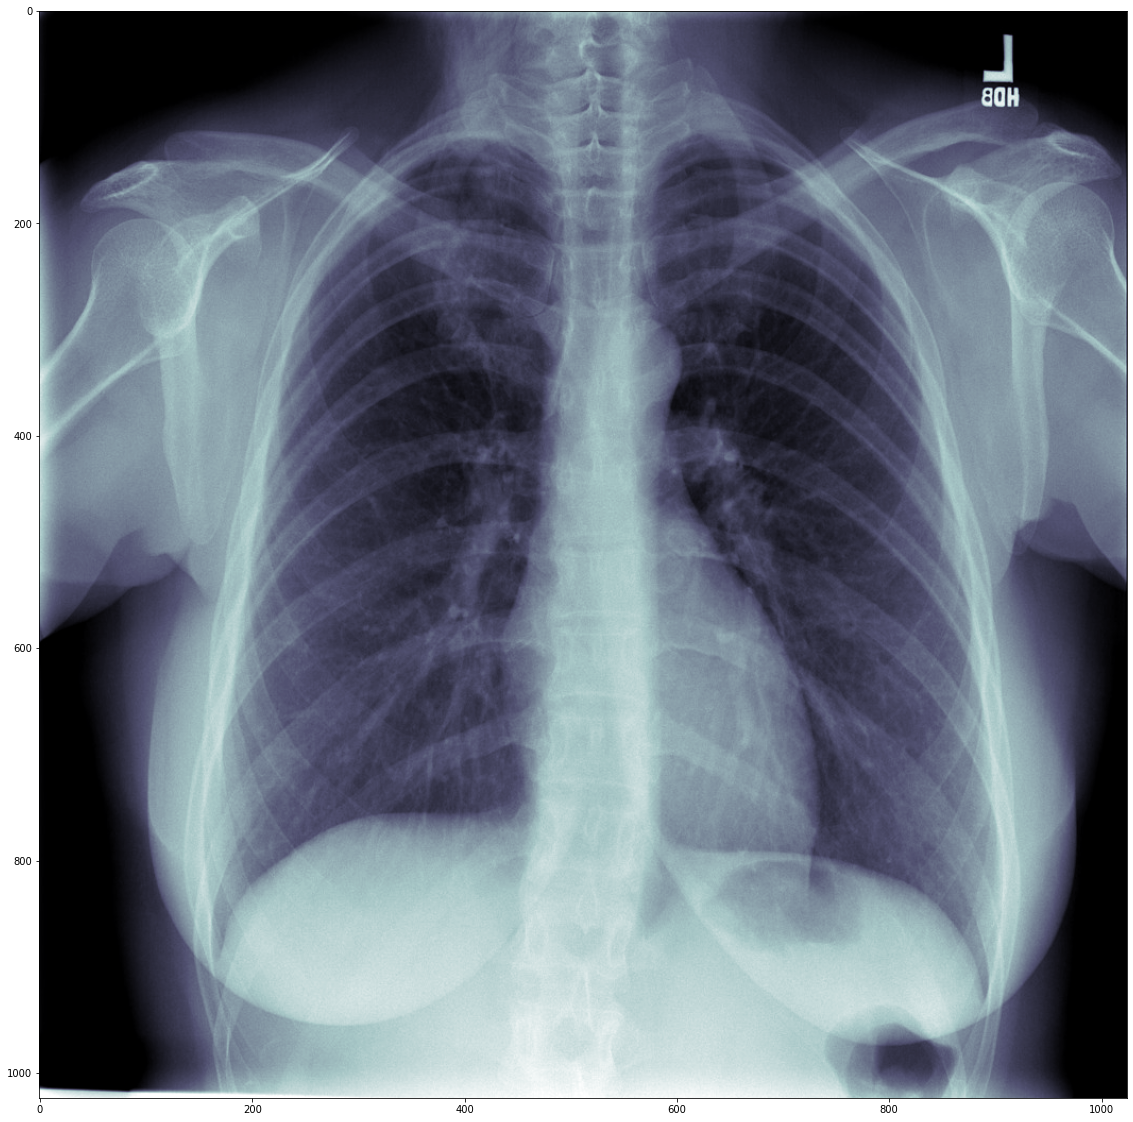

In [ ]:
example = '/content/drive/MyDrive/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.5964.1517875193.142752/1.2.276.0.7230010.3.1.3.8323329.5964.1517875193.142751/1.2.276.0.7230010.3.1.4.8323329.5964.1517875193.142753.dcm'
ds = pydicom.dcmread(example)
plt.rcParams['figure.figsize'] = 20, 20
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()


In [ ]:
a = learn_inf.predict(example)


array([105, '1.2.276.0.7230010.3.1.4.8323329.2367.1517875172.378051',
       'Pneumothorax',
       Path('/content/drive/MyDrive/pneumothorax/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2367.1517875172.378050/1.2.276.0.7230010.3.1.3.8323329.2367.1517875172.378049/1.2.276.0.7230010.3.1.4.8323329.2367.1517875172.378051.dcm')],
      dtype=object)

In [ ]:
tensor2pred = {'0': 'No Pneumothorax', '1':'Pneumothorax'}
bad_labels = []

for row in df_new2.values:
    pred = learn_inf.predict(row[-1])
    if tensor2pred[pred[0]]!= row[-2]:
        bad_labels.append(row)
    if len(bad_labels) > 20 :
        break

In [ ]:
dls_bad_pred = pneumothorax.dataloaders(bad_labels)

In [ ]:
a = dls_bad_pred.one_batch()

In [ ]:
learn_inf.dls = dls
learn_inf.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_inf)

In [ ]:
interp.top_plot_losses()

In [ ]:
plt.rcParams['figure.figsize'] = 15, 15

for j in bad_labels:
    ds = pydicom.dcmread(j['path'])
    plt.title(f"{learn_inf.predict(j['path'])[-1]} - {j['Labels']}")
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()


IndexError: ignored